In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from matplotlib.colors import ListedColormap
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from io import StringIO
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
import seaborn as sb

In [31]:
df = pd.read_csv("D:\\PROGRAMMING\\DATASETS\\bill_authentication.csv")
print(df.shape)
df.head()

(1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [32]:
X = df.iloc[:, :-1]
y = df[['Class']]

f_c = list(X.columns)

In [33]:
## Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
y_predict = dtr.predict(X_test)

In [37]:
metrics.r2_score(y_test, y_predict)

0.9168052668052669

In [38]:
print(metrics.confusion_matrix(y_test, y_predict))

[[191   4]
 [  3 145]]


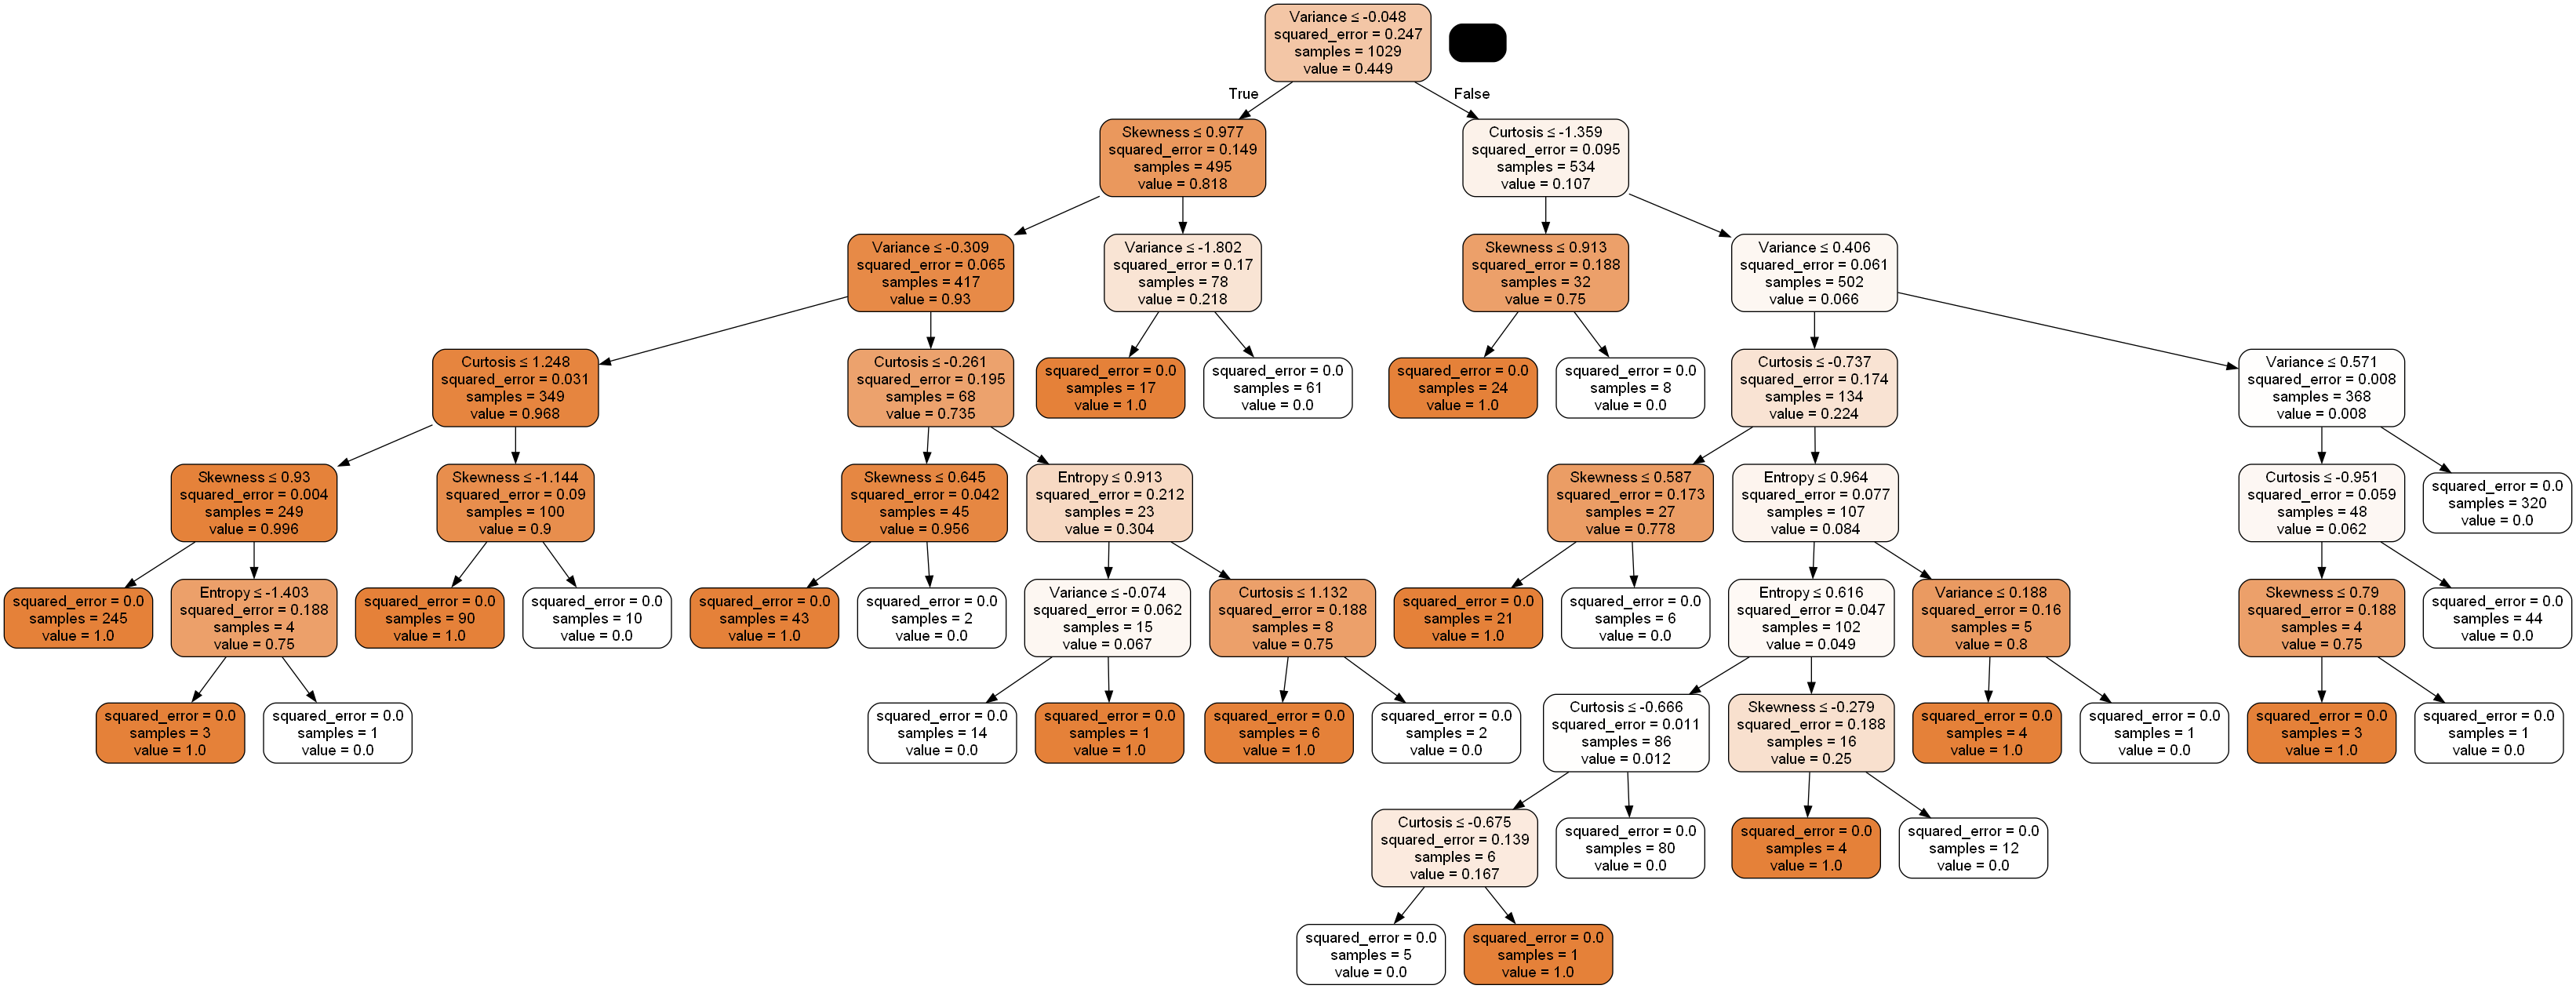

In [39]:
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = f_c,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [41]:
dtr_p = DecisionTreeRegressor(criterion='mse', max_depth=5)
dtr_p = dtr_p.fit(X_train, y_train)
y_p_p = dtr_p.predict(X_test)
print(metrics.r2_score(y_test, y_p_p))
print(metrics.mean_absolute_error(y_test, y_p_p))
print(metrics.mean_squared_error(y_test, y_p_p))

0.9299743277680129
0.02413251014691591
0.01717771422294408


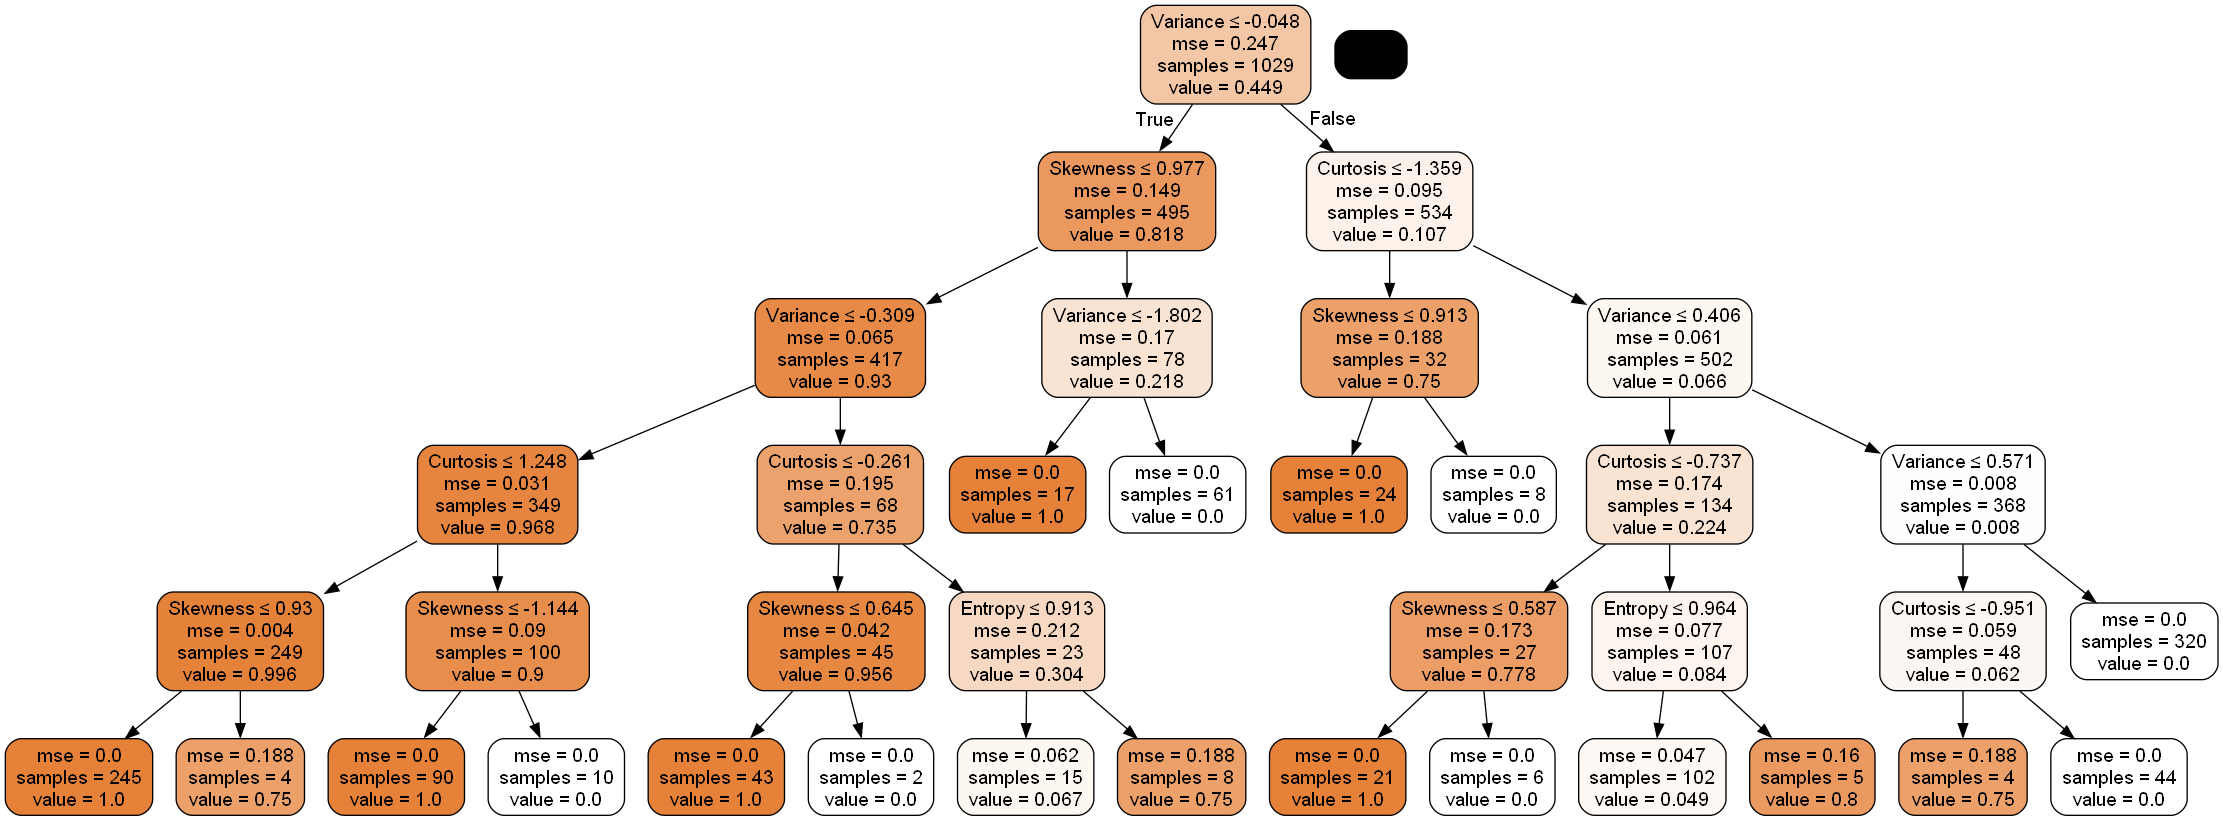

In [42]:
dot_data = StringIO()
export_graphviz(dtr_p, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = f_c,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())